# Basic TensorFlow Regression with Sequential Algorithm

In [44]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

import sqlite3 as db

print(tf.__version__)

2.8.2


In [10]:
conn = db.connect("data/mock_db_v2.db")

In [12]:
Query= """SELECT *
FROM
  (SELECT Q1.ASSETID,Q1.ASSETID,
             Q1.ASSETTYPEID,
             Q1.NAME,
             Q1.ID,AC.ID,AC.CREATEDAT,AC.UPDATEDAT,AC.ASSETID,AC.COLOR,AC.COVERAGE
   FROM
     (SELECT AAT.ASSETID,
             AAT.ASSETTYPEID,
             AT.NAME,
             AT.ID
      FROM ASSET_ASSET_TYPES AAT
      INNER JOIN ASSET_TYPE AT ON AT.ID=AAT.ASSETTYPEID) Q1
   INNER JOIN ASSET_COLOR AC ON AC.ASSETID = Q1.ASSETID) Q2
INNER JOIN ASSET A ON A.ID = Q2.ASSETID"""

df=pd.read_sql(Query,con=conn)
df

,ASSETID,ASSETID:1,ASSETTYPEID,NAME,ID,ID:1,CREATEDAT,UPDATEDAT,ASSETID:2,COLOR,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR17QS3824HQXJE6V4,2022-05-13 12:47:22.159531,2022-05-13 12:47:22.159531,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Light Gray,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
1,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR48751M0R9PACK1V5,2022-05-13 12:47:22.158055,2022-05-13 12:47:22.158055,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,White,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
2,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRQC3C3024HE3V28JK,2022-05-13 12:47:22.16095,2022-05-13 12:47:22.16095,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Khaki,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
3,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRWG8V1B4JSFHXF4HA,2022-05-13 12:47:22.156237,2022-05-13 12:47:22.156237,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Beige,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
4,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB63KFF29W4Y36MZ1NFHG,2022-05-13 12:47:22.40179,2022-05-13 12:47:22.40179,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,Gray,...,71.9500,76.9291,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:37.095722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,2022-05-13 12:47:35.886489,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Steel Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,2022-05-13 12:47:35.884683,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,2022-05-13 12:47:35.890981,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Green,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,2022-05-13 12:47:35.88791,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Gray,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


In [13]:
df=df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [14]:
df=df.drop(['deletedAt', 'duration', 'frameCount', 'framesPerSecond'],axis=1)

df.rename(columns={'NAME':'Asset_Type_Name','ID:1':'ID','name':'Filename','CREATEDAT':'CREATEDAT_COLOR'},inplace=True)

df.fillna(value=np.nan, inplace=True)

df.ASSETID=df.ASSETID.astype('category')
df.ASSETTYPEID=df.ASSETTYPEID.astype('category')
df.Asset_Type_Name=df.Asset_Type_Name.astype('category')
df.ID=df.ID.astype('category')
df.publishedAt=pd.to_datetime(df.publishedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.CREATEDAT_COLOR=pd.to_datetime(df.CREATEDAT_COLOR,format='%Y-%m-%dT%H:%M:%S.%f')
df.createdAt=pd.to_datetime(df.createdAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.updatedAt=pd.to_datetime(df.updatedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.COLOR=df.COLOR.astype('category')
df.Filename=df.Filename.astype('category')
df.campaignId=df.campaignId.astype('category')
df.sectorId=df.sectorId.astype('category')
df.fileType=df.fileType.astype('category')
df.mimeType=df.mimeType.astype('category')
df.brandId=df.brandId.astype('category')
df.parentAssetTypeId=df.parentAssetTypeId.astype('category')

data=df[['Asset_Type_Name', 'COLOR', 'COVERAGE', 'fileType', 'brandId','widthPx', 'heightPx', 'publishedAt','oohScore','smScore','tvcScore']]

data['weightedCover']=np.array(data['COVERAGE'] )* np.array(data['widthPx']) * np.array(data['heightPx'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
Top80Color = data.COLOR.value_counts().loc[data.COLOR.value_counts().cumsum().apply(lambda x: x / data.COLOR.count()) <= 0.8].index.tolist()
data.COLOR = data.COLOR.apply(lambda x: x if (x in Top80Color) else('others'))
data.COLOR.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


others                  186
Green                   142
Light Gray              122
Gray                    104
Sienna                   96
Golden Rod               75
Black                    75
Rosy Brown               40
Bordeaux/ Fire Brick     36
Name: COLOR, dtype: int64

Let's change the approach by changing Year & month as integer

In [16]:
data['year']=data.publishedAt.dt.year.astype('int')
data['month']=data.publishedAt.dt.month.astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


create the dummies variables

In [17]:
data_4_corr=data.copy()
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['COLOR'], drop_first=True, prefix='COLOR', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['Asset_Type_Name'], drop_first=True, prefix='Asset_Type_Name', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['fileType'], drop_first=True, prefix='fileType', prefix_sep='')
data_4_corr = pd.get_dummies(data=data_4_corr , columns=['brandId'], drop_first=True, prefix='brandId', prefix_sep='')
data_4_corr = data_4_corr.drop(['widthPx', 'heightPx','COVERAGE'],axis=1)
data_4_corr


,publishedAt,oohScore,smScore,tvcScore,weightedCover,year,month,COLORBordeaux/ Fire Brick,COLORGolden Rod,COLORGray,COLORGreen,COLORLight Gray,COLORRosy Brown,COLORSienna,COLORothers,Asset_Type_NameInstagram,fileTypeVIDEO,brandIdARE01G1181F9W2HYK675JR5GMQDN610E,brandIdARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,brandIdDDN01G118PW1JKFN915J6FY9B2GXQ132
0,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,161400.000,2022,4,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,306450.240,2022,4,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,99749.760,2022,4,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2022-04-17 01:04:36.976424,83.7600,71.9500,68.0782,120450.240,2022,4,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2022-04-17 01:04:37.095722,82.2400,71.9500,76.9291,124949.760,2022,4,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,111754.080,2022,4,0,0,0,0,0,0,0,1,1,1,1,0,0
872,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,212863.464,2022,4,0,0,0,0,0,0,0,1,1,1,1,0,0
873,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,70999.416,2022,4,0,0,0,1,0,0,0,0,1,1,1,0,0
874,2022-04-28 00:00:00.000000,72.2284,68.3047,37.6405,107795.448,2022,4,0,0,0,0,1,0,0,0,1,1,1,0,0


### Split Data into Train and Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_4_corr.drop(columns=['smScore','tvcScore','oohScore'],axis=1), data_4_corr.smScore,test_size=0.3)
data_train=pd.concat([X_train,y_train],axis=1)
data_train


,publishedAt,weightedCover,year,month,COLORBordeaux/ Fire Brick,COLORGolden Rod,COLORGray,COLORGreen,COLORLight Gray,COLORRosy Brown,COLORSienna,COLORothers,Asset_Type_NameInstagram,fileTypeVIDEO,brandIdARE01G1181F9W2HYK675JR5GMQDN610E,brandIdARÑ01G1183KRNFW4MH52KVBVY2KX3PD3,brandIdDDN01G118PW1JKFN915J6FY9B2GXQ132,smScore
632,2019-07-23 16:02:04,302080.104000,2019,7,0,0,0,0,1,0,0,0,1,0,0,0,1,45.7125
377,2022-03-11 18:22:05,388395.648000,2022,3,0,0,0,0,0,1,0,0,1,0,0,1,0,68.6625
615,2019-05-03 17:30:02,151951.302000,2019,5,0,0,0,0,0,0,1,0,1,0,0,0,1,45.7125
501,2021-04-27 12:44:31,140697.000000,2021,4,0,0,0,0,0,0,0,1,1,0,1,0,0,84.3875
625,2019-07-04 10:30:43,120466.958400,2019,7,0,0,0,0,0,0,0,1,1,0,0,0,1,54.1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2022-03-11 18:22:05,329264.352000,2022,3,0,0,0,1,0,0,0,0,1,0,0,1,0,68.6625
780,2021-07-30 13:05:59,918217.036800,2021,7,0,0,0,0,0,0,1,0,1,0,0,0,1,68.1750
152,2021-09-26 09:20:08,390434.349822,2021,9,0,0,1,0,0,0,0,0,1,0,0,1,0,54.3625
837,2022-01-24 11:47:20,216293.857221,2022,1,0,0,0,0,0,0,0,0,1,0,0,0,1,49.7375


Descriptive Statistics

In [19]:
train_stats_ = data_train.describe()
train_stats_.pop('smScore')
train_stats_ = train_stats_.transpose()
train_stats_

,count,mean,std,min,25%,50%,75%,max
weightedCover,613.0,285285.425890,242479.724152,20631.033856,150752.94264,207093.66336,324769.3056,2181168.0
year,613.0,2021.081566,0.919933,2016.000000,2021.00000,2021.00000,2022.0000,2022.0
month,613.0,5.993475,3.262977,1.000000,3.00000,5.00000,9.0000,12.0
COLORBordeaux/ Fire Brick,613.0,0.042414,0.201697,0.000000,0.00000,0.00000,0.0000,1.0
COLORGolden Rod,613.0,0.091354,0.288347,0.000000,0.00000,0.00000,0.0000,1.0
COLORGray,613.0,0.117455,0.322225,0.000000,0.00000,0.00000,0.0000,1.0
COLORGreen,613.0,0.156607,0.363726,0.000000,0.00000,0.00000,0.0000,1.0
COLORLight Gray,613.0,0.145188,0.352578,0.000000,0.00000,0.00000,0.0000,1.0
COLORRosy Brown,613.0,0.047308,0.212471,0.000000,0.00000,0.00000,0.0000,1.0
COLORSienna,613.0,0.114192,0.318305,0.000000,0.00000,0.00000,0.0000,1.0


### Split the train & test labels 


In [20]:
train_labels_ =  data_train.pop('smScore')
test_labels_ = y_test.copy()

### Normalize Data

In [21]:
data_train=data_train.drop('publishedAt',axis=1)

In [23]:
X_test=X_test.drop('publishedAt',axis=1)

In [24]:
def norm(x):
  return (x - train_stats_['mean']) / train_stats_['std']
normed_train_data_ = norm(data_train)
normed_test_data_= norm(X_test)

In [25]:
#check for null values
normed_train_data_.isnull().sum().sort_values(ascending=False)

weightedCover                              0
year                                       0
month                                      0
COLORBordeaux/ Fire Brick                  0
COLORGolden Rod                            0
COLORGray                                  0
COLORGreen                                 0
COLORLight Gray                            0
COLORRosy Brown                            0
COLORSienna                                0
COLORothers                                0
Asset_Type_NameInstagram                   0
fileTypeVIDEO                              0
brandIdARE01G1181F9W2HYK675JR5GMQDN610E    0
brandIdARÑ01G1183KRNFW4MH52KVBVY2KX3PD3    0
brandIdDDN01G118PW1JKFN915J6FY9B2GXQ132    0
dtype: int64

Normalized data are going to be the input for the Model.

## Model

the model is set up with 2 dense layer and an output layer that delivers a single continuous value

In [26]:
# check the Keys for training data
data_train.keys()

Index(['weightedCover', 'year', 'month', 'COLORBordeaux/ Fire Brick',
       'COLORGolden Rod', 'COLORGray', 'COLORGreen', 'COLORLight Gray',
       'COLORRosy Brown', 'COLORSienna', 'COLORothers',
       'Asset_Type_NameInstagram', 'fileTypeVIDEO',
       'brandIdARE01G1181F9W2HYK675JR5GMQDN610E',
       'brandIdARÑ01G1183KRNFW4MH52KVBVY2KX3PD3',
       'brandIdDDN01G118PW1JKFN915J6FY9B2GXQ132'],
      dtype='object')

In [27]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(data_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [28]:
model = build_model()

### Inspect the model

let's check a simple descriptive characteristics of the model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


Let's check the model initial predictions with the first 10 records

In [30]:
example_batch = normed_train_data_[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02019587],
       [-0.00476295],
       [ 0.0769046 ],
       [-0.37341204],
       [-0.43606198],
       [-0.2918655 ],
       [ 0.09849226],
       [-0.21730417],
       [ 0.01549529],
       [ 0.12277706]], dtype=float32)

### Model Training 

Let's train the model with 1000 epochs 

In [31]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data_, train_labels_,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

let's check the progress of the last epochs

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,97.739769,6.795467,97.739769,274.838593,13.340646,274.838593,995
996,98.220985,6.791252,98.220985,274.190033,13.154826,274.190033,996
997,98.095543,6.785890,98.095543,271.047394,13.187753,271.047394,997
998,97.746925,6.780339,97.746925,270.606293,13.107995,270.606293,998
999,99.321938,6.838481,99.321938,271.853424,13.215747,271.853424,999


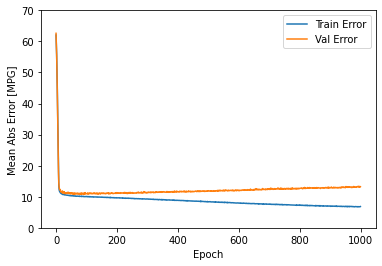

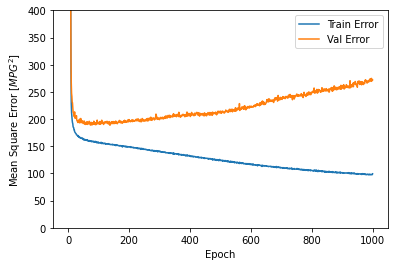

In [36]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,70])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,400])
  plt.legend()
  plt.show()


plot_history(history)

the graph showed low improvement, even getting worse in latter epochs. 

Let's use EarlyStopping to set a condition for training for each epoch, therefore after *n* number of epochs without improvement training must be stopped.


.........................................................................

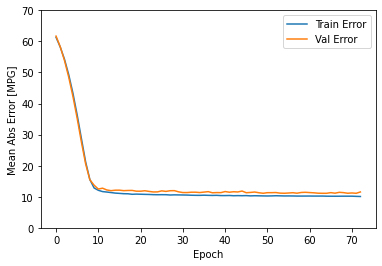

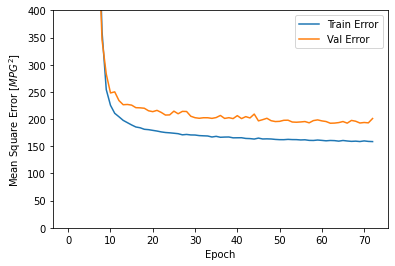

In [37]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data_, train_labels_, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [50]:
Error_m=pd.DataFrame(columns=['MedAE','MAE','MSE','R2S'],
                     data=[[8.906454,	11.203411,	15.508314,	-0.358515],
                      	[9.202757,	10.360238,	12.613939,	0.151068]],index=['model1','model2'])
Error_m.loc['Sequential','MedAE']=skm.median_absolute_error(y_test, test_predictions)
Error_m.loc['Sequential','MAE']=skm.mean_absolute_error(y_test, test_predictions)
Error_m.loc['Sequential','MSE']=np.sqrt(skm.mean_squared_error(y_test, test_predictions))
Error_m.loc['Sequential','R2S']=skm.r2_score(y_test, test_predictions)
Error_m

,MedAE,MAE,MSE,R2S
model1,8.906454,11.203411,15.508314,-0.358515
model2,9.202757,10.360238,12.613939,0.151068
Sequential,10.321890,11.539916,13.733385,-0.166698


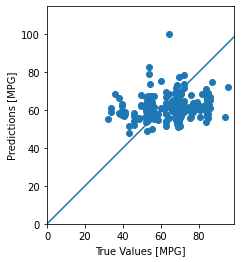

In [39]:
test_predictions = model.predict(normed_test_data_).flatten()

plt.scatter(test_labels_, test_predictions)
plt.xlabel('True Values [smScore]')
plt.ylabel('Predictions [smScore]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

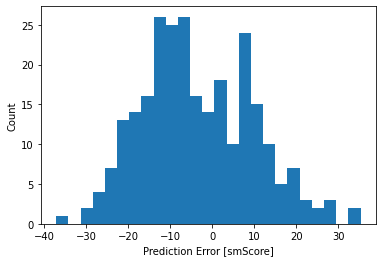

In [40]:
error = test_predictions - test_labels_
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [smScore]")
_ = plt.ylabel("Count")

The residuals distribution is kinda Normal, but shows a good shape.